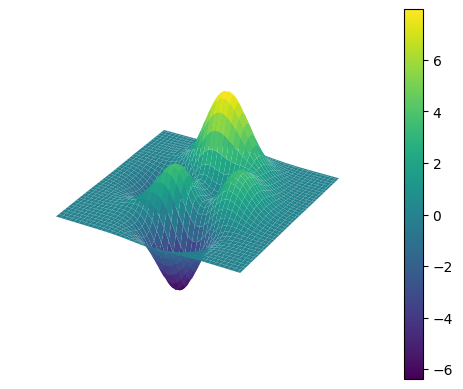

In [21]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# 生成数据
x = np.linspace(-3, 3, 80)
y = np.linspace(-3, 3, 80)
x, y = np.meshgrid(x, y)

z = 3*(1-x)**2 * np.exp(-(x**2) - (y+1)**2) \
    - 10*(x/5 - x**3 - y**5) * np.exp(-x**2 - y**2) \
    - 1/3 * np.exp(-(x+1)**2 - y**2)

# 创建图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面图
surf = ax.plot_surface(x, y, z, cmap='viridis')

# 添加颜色条
fig.colorbar(surf)

# 设置标签
ax.set_axis_off()

# 显示图形
plt.show()


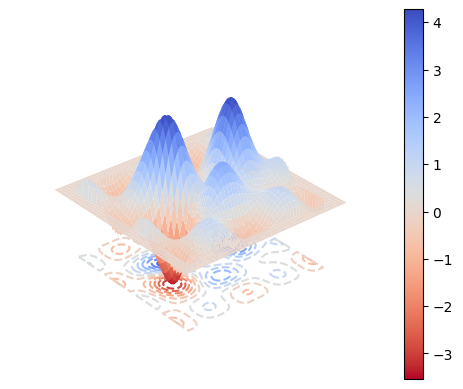

In [59]:
import numpy as np
import matplotlib.pyplot as plt


def adjusted_peaks_function(x, y):
    return (3*(1-x)**2*np.exp(-(x**2) - (y+1)**2)
            - 5*(x/5 - x**3 - y**5)*np.exp(-x**2-y**2)
            - 1/3*np.exp(-(x+1)**2 - y**2)
            + np.sin(2*x)*np.cos(2*y))  # 调整sin和cos频率以减少小峰

# 生成数据
x = np.linspace(-3.5, 3.5, 1000)
y = np.linspace(-3.5, 3.5, 1000)
x, y = np.meshgrid(x, y)
z = adjusted_peaks_function(x, y)

z[(x < -3) | (x > 3) | (y < -3) | (y > 3)] = 0

# 创建图形对象
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 绘制曲面图
surf = ax.plot_surface(x, y, z, cmap='coolwarm_r', antialiased=True)

# 添加颜色条
fig.colorbar(surf)

# 绘制等高线
contours = ax.contour(x, y, z, zdir='z', offset=ax.get_zlim()[0], levels=np.linspace(z.min(), z.max(), 15), cmap='coolwarm_r', linestyles='dashed')

# 设置标签
ax.set_axis_off()
ax.view_init(elev=30, azim=320)

# 显示图形
plt.savefig('3d_surface.png', dpi=800)


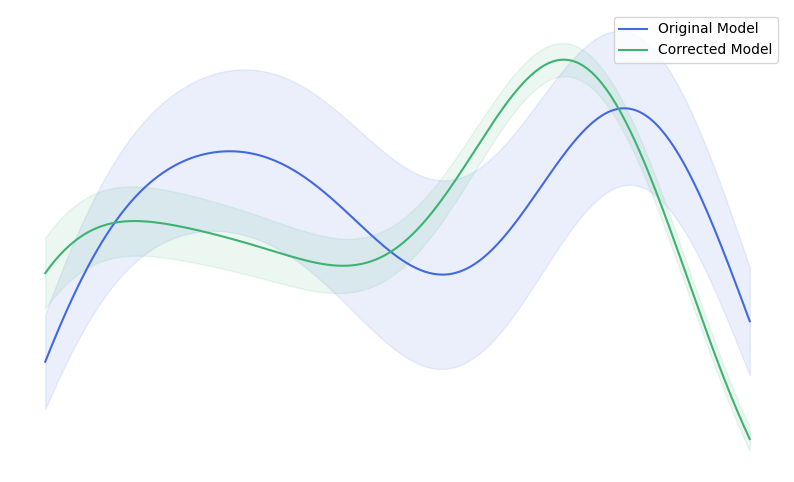

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Data
x = np.linspace(0, 3, 300)
y1 = np.sin(x) + 0.5 * np.sin(3*x) + 0.1 * np.cos(5*x)
y2 = np.sin(x) + 0.5 * np.sin(3*x + 1) + 0.1 * np.cos(5*x + 1)

# Variance data
variance1 = 0.2 + 0.2 * np.sin(x)
variance2 = 0.1 + 0.05 * np.cos(x)
y1_upper = y1 + variance1
y1_lower = y1 - variance1
y2_upper = y2 + variance2
y2_lower = y2 - variance2

# Plotting
plt.figure(figsize=(10, 6))

# Using a different color palette
plt.plot(x, y1, color='royalblue', label='Original Model')
plt.fill_between(x, y1_lower, y1_upper, color='royalblue', alpha=0.1)

plt.plot(x, y2, color='mediumseagreen', label='Corrected Model')
plt.fill_between(x, y2_lower, y2_upper, color='mediumseagreen', alpha=0.1)

# Remove axes and grid
plt.axis('off')
plt.legend()
# Display the plot
plt.savefig('line_plot_with_error_bands.png', dpi=800)  
